## 2023 06/22 Feature Extraction Methods

*Last Updated*: 2023-06-23

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* Gabor filter kernels, edge detection, LBP



### Key Results

In [ ]:
import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray
import imageio
import skimage
from scipy import ndimage
import pandas as pd
import matplotlib as mpl
from skimage import feature
from rembg import remove
import easygui
from scipy import ndimage as ndi
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
from skimage.filters import gabor
from numpy import asarray

In [44]:
#load sample images
images = []
def load_images(foldername):
    for filename in os.listdir(foldername):
        if filename == ".DS_Store":
            continue
        input = Image.open(os.path.join(foldername,filename))
        print(filename)
        
        if input is not None:
            images.append(input)
    return images
img_list = load_images("/Users/hannahzhang/Downloads/test_ims/")

16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
image007.jpg
E4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


### Rembg Images

In [35]:
removed_ims = []

for im in images:
    output = remove(im)
    removed_ims.append(output)
    output.show()

In [36]:
len(removed_ims)

6

### Gabor Filter Sample

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: brick


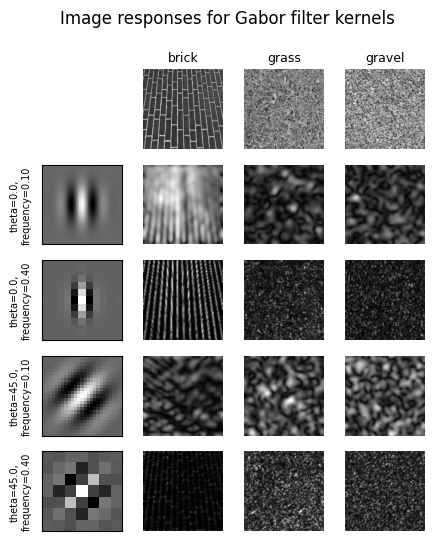

In [45]:
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
brick = img_as_float(data.brick())[shrink]
grass = img_as_float(data.grass())[shrink]
gravel = img_as_float(data.gravel())[shrink]
image_names = ('brick', 'grass', 'gravel')
images = (brick, grass, gravel)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(gravel, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(ndi.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(ndi.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = f"theta={theta * 180 / np.pi},\nfrequency={frequency:.2f}"
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel))
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

### Edge Detection Using Gabor

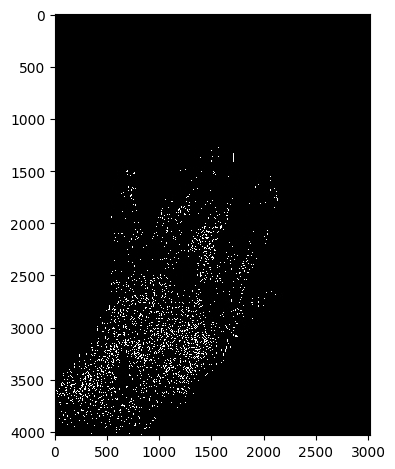

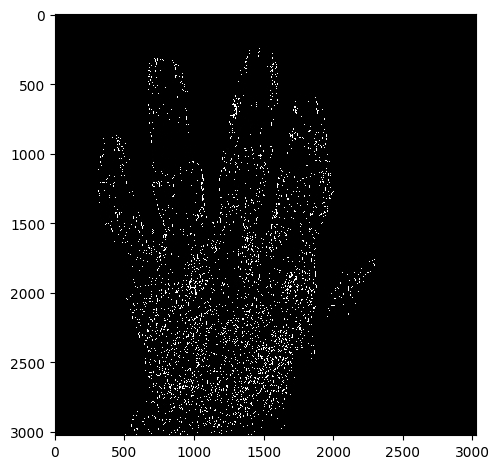

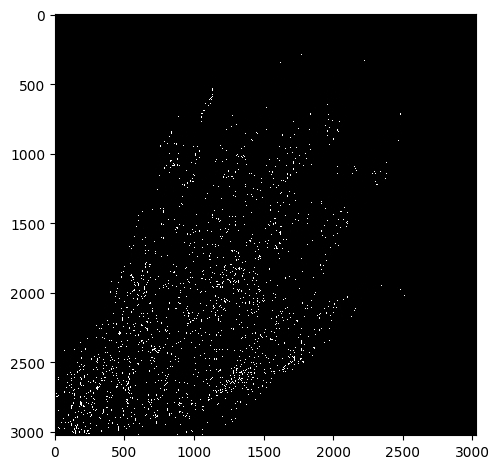

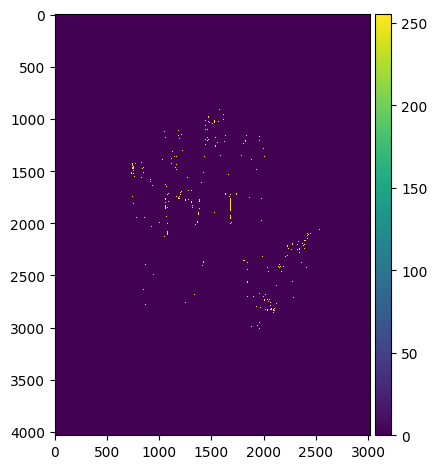

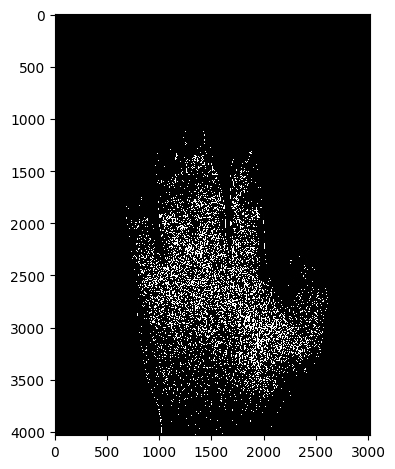

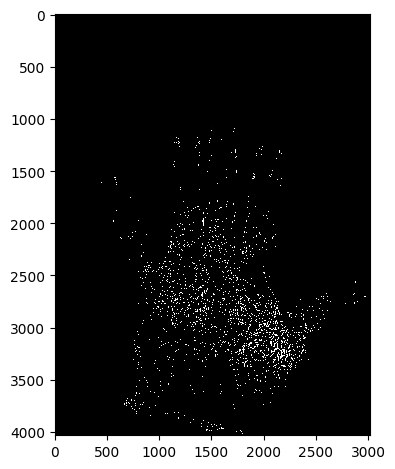

In [53]:
for im in removed_ims:
    arr = np.array(im)
    opencvim = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

# detecting edges in hand images
    filt_real, filt_imag = gabor(opencvim, frequency=0.2)
    plt.figure()            
    io.imshow(filt_real)    
    io.show()  

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor100 : theta= 2.356194490192345 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor101 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor102 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor103 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor104 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor105 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor106 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor107 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor108 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor109 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor110 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor118 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor119 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor123 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor124 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor125 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor126 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor127 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor128 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor129 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor130 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor131 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor132 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor133 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor134 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor135 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor136 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor137 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor138 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor139 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor140 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor141 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor142 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor143 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor144 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor145 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor146 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor147 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor148 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor149 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor150 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor151 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor152 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor153 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor154 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor155 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor156 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor157 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor158 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor159 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor160 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor161 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor162 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor163 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor164 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor165 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor166 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor167 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor168 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor169 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor170 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor171 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor172 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor173 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor174 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor175 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor176 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor177 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor178 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor179 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor180 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor181 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor182 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor183 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor184 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor185 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor186 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor187 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor188 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor189 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor190 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor191 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor192 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor193 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor194 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor195 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor196 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor197 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor198 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor199 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor200 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor201 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor202 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor203 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor204 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor205 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor206 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor207 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor208 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor209 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor210 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor211 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor212 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor213 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor214 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor216 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor217 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor226 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor227 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor228 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor229 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor230 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor231 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor232 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor233 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor234 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor235 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor236 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor237 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor238 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor239 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor240 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor241 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor242 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor243 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor244 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor245 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor246 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor247 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor248 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor249 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor250 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor251 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor252 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor253 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor254 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor255 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/1231094858.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor256 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             166       0       0     255     255     141     112      66   
1             166       0       0     255     255     140     111      65   
2             172       0       0     255     255     137     110      64   
3             164       0       0     255     255     136     108      64   
4             152       0       0     255     255     135     107      63   

   Gabor8  Gabor9  ...  Gabor247  Gabor248  Gabor249  Gabor250  Gabor251  \
0      53       0  ...       239       231         0         0       255   
1      52       0  ...       228       221         0         0       255   
2      52       0  ...       207       200         0         0       255   
3      51       0  ...       219       212         0         0       255   
4      50       0  ...       240       233         0         0       2

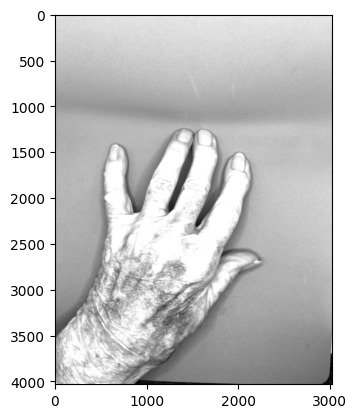

In [88]:
img = cv2.imread('/Applications/DermaML/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg')
#plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a label in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                #cv2.imwrite('images/gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                reshaped_im = filtered_img.reshape(img.shape)

                plt.imshow(reshaped_im)

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())

### LBP

In [57]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist



In [58]:
img1 = imageio.imread("/Applications/DermaML/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg")
lbp1 = lbp_features(img1,2,8)

/var/folders/_b/p6x0zmx93rj7skgwsjjv3hym0000gn/T/ipykernel_33622/2033823272.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread("/Applications/DermaML/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg")


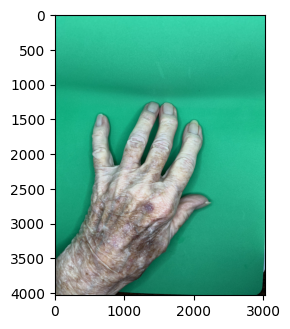

In [59]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1)

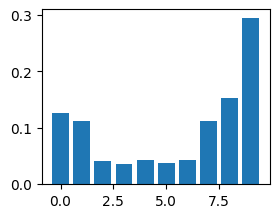

In [60]:
vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 

### texture features

In [61]:
for im in removed_ims:
    #im.show()
    arr = np.array(im)
    opencvim = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

    # Calculate the co-occurrence matrix for the image
    co_matrix = skimage.feature.graycomatrix(opencvim, [5], [0], levels=256, symmetric=True, normed=True)

# Calculate texture features from the co-occurrence matrix
    contrast = skimage.feature.graycoprops(co_matrix, 'contrast')
    correlation = skimage.feature.graycoprops(co_matrix, 'correlation')
    energy = skimage.feature.graycoprops(co_matrix, 'energy')
    homogeneity = skimage.feature.graycoprops(co_matrix, 'homogeneity')

# Print the texture features
    print("Contrast:", contrast)
    print("Correlation:", correlation)
    print("Energy:", energy)
    print("Homogeneity:", homogeneity)

Contrast: [[88.24778848]]
Correlation: [[0.99139833]]
Energy: [[0.6990953]]
Homogeneity: [[0.73341306]]
Contrast: [[96.88181552]]
Correlation: [[0.99219793]]
Energy: [[0.6048334]]
Homogeneity: [[0.65231704]]
Contrast: [[75.48835068]]
Correlation: [[0.99417192]]
Energy: [[0.52591458]]
Homogeneity: [[0.5896858]]
Contrast: [[28.18895984]]
Correlation: [[0.99717227]]
Energy: [[0.70846664]]
Homogeneity: [[0.76492041]]
Contrast: [[150.09003461]]
Correlation: [[0.9430467]]
Energy: [[0.67150385]]
Homogeneity: [[0.70213874]]
Contrast: [[60.96856664]]
Correlation: [[0.99231084]]
Energy: [[0.64394295]]
Homogeneity: [[0.69126761]]


### Gradient Calculation

https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

In [67]:
# Noise Reduction

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


In [63]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [64]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [65]:

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [66]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [68]:
from  skimage.feature import canny
from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import convolve
from scipy import misc


def Canny_detector(img):
    """ Your implementation instead of skimage """
    
    img_filtered = convolve(img, gaussian_kernel(5, sigma=1.4))
    grad, theta = sobel_filters(img_filtered)
    img_nms = non_max_suppression(grad, theta)
    img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.07, highThresholdRatio=0.19)
    img_final = hysteresis(img_thresh, weak, strong=strong)
   
    return img_final